[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving fer2013.tar to fer2013 (1).tar


KeyboardInterrupt: ignored

In [2]:
!ls

baddata.txt  datalab  fer2013  fer2013 (1).tar	fer2013.tar


In [0]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [3]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 64
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

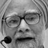

In [12]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))
'''
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
'''
#model.add(Flatten())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())


model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.3))

model.add(Dense(7))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        153       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 48, 48, 64)        5760      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [25]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    shear_range=0.2,
    zoom_range=0.2)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=50,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
447/446 [==============================] - 60s 134ms/step - loss: 0.6143 - acc: 0.7719 - val_loss: 1.0913 - val_acc: 0.6689

Epoch 00001: val_acc improved from 0.66360 to 0.66890, saving model to Model.best.hdf5
Epoch 2/50
188/446 [===========>..................] - ETA: 33s - loss: 0.6089 - acc: 0.7759

447/446 [==============================] - 60s 135ms/step - loss: 0.6119 - acc: 0.7727 - val_loss: 1.1278 - val_acc: 0.6533

Epoch 00002: val_acc did not improve from 0.66890
Epoch 3/50
297/446 [==================>...........] - ETA: 19s - loss: 0.6054 - acc: 0.7721

447/446 [==============================] - 60s 135ms/step - loss: 0.6100 - acc: 0.7712 - val_loss: 1.1009 - val_acc: 0.6552

Epoch 00003: val_acc did not improve from 0.66890
Epoch 4/50
330/446 [=====================>........] - ETA: 15s - loss: 0.6091 - acc: 0.7726

447/446 [==============================] - 60s 134ms/step - loss: 0.6110 - acc: 0.7739 - val_loss: 1.1480 - val_acc: 0.6603

Epoch 00004: val_acc did not improve from 0.66890
Epoch 5/50
340/446 [=====================>........] - ETA: 13s - loss: 0.6022 - acc: 0.7765

447/446 [==============================] - 60s 135ms/step - loss: 0.6058 - acc: 0.7732 - val_loss: 1.1031 - val_acc: 0.6642

Epoch 00005: val_acc did not improve from 0.66890
Epoch 6/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6037 - acc: 0.7742

447/446 [==============================] - 60s 135ms/step - loss: 0.6087 - acc: 0.7726 - val_loss: 1.1528 - val_acc: 0.6444

Epoch 00006: val_acc did not improve from 0.66890
Epoch 7/50
344/446 [======================>.......] - ETA: 13s - loss: 0.6054 - acc: 0.7739

447/446 [==============================] - 60s 135ms/step - loss: 0.6098 - acc: 0.7729 - val_loss: 1.1239 - val_acc: 0.6508

Epoch 00007: val_acc did not improve from 0.66890
Epoch 8/50
344/446 [======================>.......] - ETA: 13s - loss: 0.5963 - acc: 0.7763

447/446 [==============================] - 60s 134ms/step - loss: 0.5987 - acc: 0.7775 - val_loss: 1.1266 - val_acc: 0.6471

Epoch 00008: val_acc did not improve from 0.66890
Epoch 9/50
344/446 [======================>.......] - ETA: 13s - loss: 0.5896 - acc: 0.7792

447/446 [==============================] - 60s 135ms/step - loss: 0.5943 - acc: 0.7773 - val_loss: 1.1887 - val_acc: 0.6446

Epoch 00009: val_acc did not improve from 0.66890
Epoch 10/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5956 - acc: 0.7780

447/446 [==============================] - 60s 135ms/step - loss: 0.5980 - acc: 0.7770 - val_loss: 1.1506 - val_acc: 0.6505

Epoch 00010: val_acc did not improve from 0.66890
Epoch 11/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5900 - acc: 0.7814

447/446 [==============================] - 60s 135ms/step - loss: 0.5964 - acc: 0.7784 - val_loss: 1.2169 - val_acc: 0.6335

Epoch 00011: val_acc did not improve from 0.66890
Epoch 12/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5821 - acc: 0.7842

447/446 [==============================] - 60s 135ms/step - loss: 0.5879 - acc: 0.7813 - val_loss: 1.1711 - val_acc: 0.6566

Epoch 00012: val_acc did not improve from 0.66890
Epoch 13/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5887 - acc: 0.7789

447/446 [==============================] - 60s 135ms/step - loss: 0.5878 - acc: 0.7795 - val_loss: 1.1820 - val_acc: 0.6522

Epoch 00013: val_acc did not improve from 0.66890
Epoch 14/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5796 - acc: 0.7831

447/446 [==============================] - 60s 135ms/step - loss: 0.5888 - acc: 0.7811 - val_loss: 1.1494 - val_acc: 0.6575

Epoch 00014: val_acc did not improve from 0.66890
Epoch 15/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5812 - acc: 0.7842

447/446 [==============================] - 60s 135ms/step - loss: 0.5826 - acc: 0.7838 - val_loss: 1.1710 - val_acc: 0.6614

Epoch 00015: val_acc did not improve from 0.66890
Epoch 16/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5750 - acc: 0.7840

447/446 [==============================] - 60s 135ms/step - loss: 0.5850 - acc: 0.7807 - val_loss: 1.1587 - val_acc: 0.6508

Epoch 00016: val_acc did not improve from 0.66890
Epoch 17/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5824 - acc: 0.7797

447/446 [==============================] - 60s 134ms/step - loss: 0.5884 - acc: 0.7769 - val_loss: 1.1200 - val_acc: 0.6639

Epoch 00017: val_acc did not improve from 0.66890
Epoch 18/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5809 - acc: 0.7818

447/446 [==============================] - 60s 135ms/step - loss: 0.5825 - acc: 0.7822 - val_loss: 1.1736 - val_acc: 0.6589

Epoch 00018: val_acc did not improve from 0.66890
Epoch 19/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5840 - acc: 0.7810

447/446 [==============================] - 60s 135ms/step - loss: 0.5867 - acc: 0.7792 - val_loss: 1.1761 - val_acc: 0.6541

Epoch 00019: val_acc did not improve from 0.66890
Epoch 20/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5684 - acc: 0.7885

447/446 [==============================] - 60s 134ms/step - loss: 0.5713 - acc: 0.7868 - val_loss: 1.1476 - val_acc: 0.6463

Epoch 00020: val_acc did not improve from 0.66890
Epoch 21/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5801 - acc: 0.7840

447/446 [==============================] - 60s 135ms/step - loss: 0.5781 - acc: 0.7844 - val_loss: 1.1254 - val_acc: 0.6686

Epoch 00021: val_acc did not improve from 0.66890
Epoch 22/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5697 - acc: 0.7867

447/446 [==============================] - 60s 135ms/step - loss: 0.5733 - acc: 0.7856 - val_loss: 1.1761 - val_acc: 0.6541

Epoch 00022: val_acc did not improve from 0.66890
Epoch 23/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5724 - acc: 0.7894

447/446 [==============================] - 60s 135ms/step - loss: 0.5727 - acc: 0.7890 - val_loss: 1.1858 - val_acc: 0.6460

Epoch 00023: val_acc did not improve from 0.66890
Epoch 24/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5600 - acc: 0.7920

447/446 [==============================] - 60s 135ms/step - loss: 0.5694 - acc: 0.7882 - val_loss: 1.1185 - val_acc: 0.6600

Epoch 00024: val_acc did not improve from 0.66890
Epoch 25/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5711 - acc: 0.7885

447/446 [==============================] - 60s 135ms/step - loss: 0.5739 - acc: 0.7862 - val_loss: 1.2377 - val_acc: 0.6416

Epoch 00025: val_acc did not improve from 0.66890
Epoch 26/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5613 - acc: 0.7927

447/446 [==============================] - 60s 135ms/step - loss: 0.5700 - acc: 0.7881 - val_loss: 1.1748 - val_acc: 0.6561

Epoch 00026: val_acc did not improve from 0.66890
Epoch 27/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5597 - acc: 0.7919

447/446 [==============================] - 60s 135ms/step - loss: 0.5637 - acc: 0.7907 - val_loss: 1.2131 - val_acc: 0.6410

Epoch 00027: val_acc did not improve from 0.66890
Epoch 28/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5589 - acc: 0.7917

447/446 [==============================] - 60s 134ms/step - loss: 0.5621 - acc: 0.7905 - val_loss: 1.1514 - val_acc: 0.6678

Epoch 00028: val_acc did not improve from 0.66890
Epoch 29/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5665 - acc: 0.7908

447/446 [==============================] - 60s 134ms/step - loss: 0.5676 - acc: 0.7896 - val_loss: 1.1681 - val_acc: 0.6591

Epoch 00029: val_acc did not improve from 0.66890
Epoch 30/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5536 - acc: 0.7941

447/446 [==============================] - 60s 135ms/step - loss: 0.5583 - acc: 0.7927 - val_loss: 1.2053 - val_acc: 0.6538

Epoch 00030: val_acc did not improve from 0.66890
Epoch 31/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5478 - acc: 0.7991

447/446 [==============================] - 60s 135ms/step - loss: 0.5560 - acc: 0.7958 - val_loss: 1.2157 - val_acc: 0.6502

Epoch 00031: val_acc did not improve from 0.66890
Epoch 32/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5467 - acc: 0.7985

447/446 [==============================] - 60s 135ms/step - loss: 0.5504 - acc: 0.7970 - val_loss: 1.1654 - val_acc: 0.6650

Epoch 00032: val_acc did not improve from 0.66890
Epoch 33/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5605 - acc: 0.7915

447/446 [==============================] - 60s 134ms/step - loss: 0.5649 - acc: 0.7888 - val_loss: 1.1955 - val_acc: 0.6561

Epoch 00033: val_acc did not improve from 0.66890
Epoch 34/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5523 - acc: 0.7935

447/446 [==============================] - 60s 135ms/step - loss: 0.5544 - acc: 0.7927 - val_loss: 1.2220 - val_acc: 0.6418

Epoch 00034: val_acc did not improve from 0.66890
Epoch 35/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5602 - acc: 0.7905

447/446 [==============================] - 60s 135ms/step - loss: 0.5566 - acc: 0.7920 - val_loss: 1.1879 - val_acc: 0.6586

Epoch 00035: val_acc did not improve from 0.66890
Epoch 36/50
343/446 [======================>.......] - ETA: 13s - loss: 0.5450 - acc: 0.7954

447/446 [==============================] - 60s 135ms/step - loss: 0.5510 - acc: 0.7934 - val_loss: 1.1584 - val_acc: 0.6709

Epoch 00036: val_acc improved from 0.66890 to 0.67085, saving model to Model.best.hdf5
Epoch 37/50
300/446 [===================>..........] - ETA: 19s - loss: 0.5452 - acc: 0.7974

447/446 [==============================] - 60s 134ms/step - loss: 0.5506 - acc: 0.7949 - val_loss: 1.1955 - val_acc: 0.6555

Epoch 00037: val_acc did not improve from 0.67085
Epoch 38/50
330/446 [=====================>........] - ETA: 15s - loss: 0.5516 - acc: 0.7952

447/446 [==============================] - 60s 135ms/step - loss: 0.5502 - acc: 0.7959 - val_loss: 1.1943 - val_acc: 0.6603

Epoch 00038: val_acc did not improve from 0.67085
Epoch 39/50
339/446 [=====================>........] - ETA: 13s - loss: 0.5390 - acc: 0.7991

447/446 [==============================] - 60s 134ms/step - loss: 0.5433 - acc: 0.7976 - val_loss: 1.1471 - val_acc: 0.6600

Epoch 00039: val_acc did not improve from 0.67085
Epoch 40/50
341/446 [=====================>........] - ETA: 13s - loss: 0.5455 - acc: 0.7968

447/446 [==============================] - 60s 134ms/step - loss: 0.5452 - acc: 0.7964 - val_loss: 1.2316 - val_acc: 0.6589

Epoch 00040: val_acc did not improve from 0.67085
Epoch 41/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5413 - acc: 0.7995

447/446 [==============================] - 60s 135ms/step - loss: 0.5432 - acc: 0.7985 - val_loss: 1.1713 - val_acc: 0.6675

Epoch 00041: val_acc did not improve from 0.67085
Epoch 42/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5379 - acc: 0.7972

447/446 [==============================] - 60s 134ms/step - loss: 0.5382 - acc: 0.7974 - val_loss: 1.3050 - val_acc: 0.6379

Epoch 00042: val_acc did not improve from 0.67085
Epoch 43/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5363 - acc: 0.7998

447/446 [==============================] - 60s 134ms/step - loss: 0.5409 - acc: 0.7984 - val_loss: 1.1680 - val_acc: 0.6577

Epoch 00043: val_acc did not improve from 0.67085
Epoch 44/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5362 - acc: 0.8003

447/446 [==============================] - 60s 135ms/step - loss: 0.5370 - acc: 0.7997 - val_loss: 1.1974 - val_acc: 0.6460

Epoch 00044: val_acc did not improve from 0.67085
Epoch 45/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5278 - acc: 0.8034

447/446 [==============================] - 60s 135ms/step - loss: 0.5369 - acc: 0.8000 - val_loss: 1.2847 - val_acc: 0.6469

Epoch 00045: val_acc did not improve from 0.67085
Epoch 46/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5351 - acc: 0.8018

447/446 [==============================] - 60s 135ms/step - loss: 0.5399 - acc: 0.7995 - val_loss: 1.2214 - val_acc: 0.6636

Epoch 00046: val_acc did not improve from 0.67085
Epoch 47/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5234 - acc: 0.8067

447/446 [==============================] - 60s 134ms/step - loss: 0.5266 - acc: 0.8049 - val_loss: 1.1964 - val_acc: 0.6614

Epoch 00047: val_acc did not improve from 0.67085
Epoch 48/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5337 - acc: 0.7995

447/446 [==============================] - 60s 135ms/step - loss: 0.5365 - acc: 0.7991 - val_loss: 1.2317 - val_acc: 0.6438

Epoch 00048: val_acc did not improve from 0.67085
Epoch 49/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5294 - acc: 0.8009

447/446 [==============================] - 60s 134ms/step - loss: 0.5337 - acc: 0.7990 - val_loss: 1.1384 - val_acc: 0.6616

Epoch 00049: val_acc did not improve from 0.67085
Epoch 50/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5155 - acc: 0.8092

447/446 [==============================] - 60s 135ms/step - loss: 0.5213 - acc: 0.8066 - val_loss: 1.2234 - val_acc: 0.6563

Epoch 00050: val_acc did not improve from 0.67085
--- 3010.157532930374 seconds ---


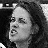

In [0]:
def predict_emotion(model, pic):
  pic = pic.convert('L')
  pic = pic.resize((48,48))
  
  from IPython.display import display
  display(pic)
  pic_np=np.asarray(pic)#.getdata()).reshape(48, 48, 1)
  pic_np = pic_np.reshape(1, 48, 48, 1)
  print(pic_np.shape)
  pic_np = pic_np / 255.0
  pic_np = pic_np - 0.5
  pic_np = pic_np * 2
  
  print(pic_np.shape)
  y = model.predict(pic_np)
  print("0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral")
  print(y)

In [0]:
from google.colab import files
uploaded = files.upload()

(48, 48, 1)


In [0]:
celebanger = Image.open("celeb_fer1.jpg")
predict_emotion(model, celebanger)

(48, 48, 1)


ValueError: ignored